# Localizacion de robot con EKF y balizas
Se dispone de un escenario donde se han desplegado en posiciones conocidas balizas estáticas que miden su distancia a un robot aéreo en dicho escenario. Se trata de desarrollar técnicas de estimación de posición 3D para un robot aéreo basados en filtro de Kalman extendido (EKF) que integra las medidas tomadas por las balizas. Plataforma de desarrollo: Matlab/ROS Lenguaje: Matlab o para ROS, C/C++ o Python

Steps:
1. Se dispone a realizar a interpretare el problema de triangulacion y trialateracion
1. Se dispone realizar 1 filtro de kalman 
1. se dispone de realizar el filtro de kalman extendido

Explicando las ecuaciones y todo al respecto

https://docs.ufpr.br/~danielsantos/ProbabilisticRobotics.pdf pagina 48

## Deteminacion de posicion utilizando balizas
obtener la posicion de un objeto de interes a partir de las distancias a posiciones de localizacion conocidadas. La localizacion basandose en la medicion de distancias a ciertos puntos de referencia de localizacion conocida (balizas ), para la localizacion de un objeto movil
<!--- [comment](http://platea.pntic.mec.es/rrodrigu/docs/MEMORIA_TRILATERACION_MEDIANTE_BIDETERMINANTE_CAYLEY_MENGER.pdf) -->

Para resolver el problema de localizacion  basta con resolver el sigiente sistema de ecuaciones que reporesental la solucion a la interseccion de las 3 esfereas definidas mediante sus centros en las posiciones de referencias y sus raidos como las distancias medidas al abjeto de interes.


$$\begin{matrix}
r_{2}^2 = (x_{1}-x_2)^2+ (y_{1}-y_2)^2 +(z_{1}-z_2)^2 \\
r_{3}^2 = (x_{1}-x_3)^2+ (y_{1}-y_3)^2 +(z_{1}-z_3)^2\\
r_{4}^2 = (x_{1}-x_4)^2+ (y_{1}-y_4)^2 +(z_{1}-z_4)^2
\end{matrix} $$


Dado que dicho sistema de escuaciones no es lineal, su solucion popuede resolver mediante metodos algebraicos, numericos como trilareacion o triangulacion, asi como mediante la linealizacion del sistema de ecuaciones como se realizara al realizar el filtro de kalman extendido.


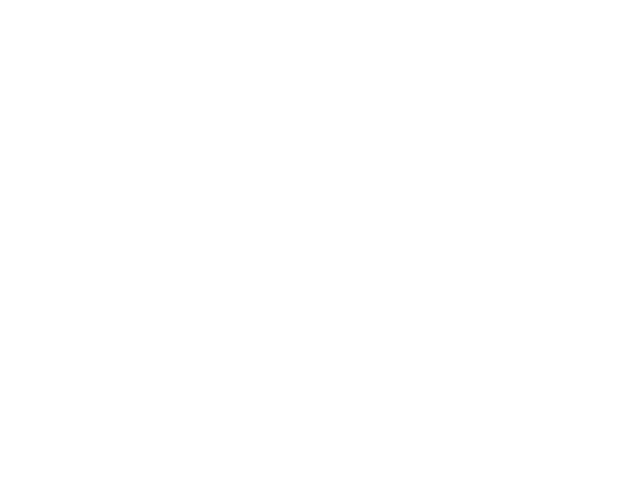

In [2]:
%matplotlib widget
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
# creating random dataset
xs = [1, 2, 4, 4, 5, 6, 7, 8, 1,4, 1, 2, 3, 4, 5, 9, 8, 7, 6, 5]
ys = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 6, 3,5, 2, 4, 1, 8, 7, 0, 5]
zs = [9, 6, 3, 5, 2, 4, 1, 8, 7, 0, 1, 2,3, 4, 5, 6, 7, 8, 9, 0]
# creating figure
fig = plt.figure()
ax = Axes3D(fig)
# crating the plot
plot_geeks = ax.scatter(xs, ys, zs, color='green')
# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
# displaying the plot
plt.show()

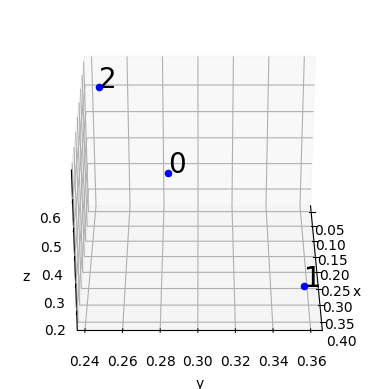

In [10]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from numpy.random import rand
from IPython.display import HTML
from matplotlib import animation

m = rand(3,3) # m is an array of (x,y,z) coordinate triplets

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(m)): # plot each point + it's index as text above
  x = m[i,0]
  y = m[i,1]
  z = m[i,2]
  label = i
  ax.scatter(x, y, z, color='b')
  ax.text(x, y, z, '%s' % (label), size=20, zorder=1, color='k')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

def animate(frame):
  ax.view_init(30, frame/4)
  plt.pause(.001)
  return fig

anim = animation.FuncAnimation(fig, animate, frames=200, interval=50)
HTML(anim.to_html5_video())

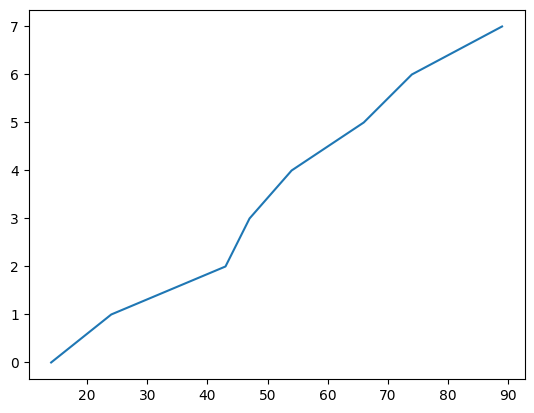

In [8]:
xs = [14, 24, 43, 47, 54, 66, 74, 89]
ys = [0, 1, 2, 3, 4, 5, 6, 7]
plt.plot(xs,ys)